# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

In [1]:
!pwd

/Users/edmond_20000/Desktop/Edmond-repo/projects/unit-projects/project-2/starter-code


In [1]:
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in /Users/edmond_20000/anaconda/lib/python2.7/site-packages


### Step 1: Load the python libraries you will need for this project 

In [7]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [8]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [9]:
df_raw.head()  #This makes the data more clearer

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [10]:
df_raw.shape #looks to be 400 records available plus some Null values

(400, 4)

In [11]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: Observations are that 400 records available and some Null values.

In [12]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

#### Question 2. Create a summary table

In [13]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [14]:
#calculate standard deviation by hand
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The standard deviaiton here is large but does not really matter since it doesn't really indicate or show anything. GPA is less distributed than GPA. The GRE numbers or values here ranges from 220 to 800 which makes GRE larger than GPA since GPA values only range from 0.00 to 4.00. 

#### Question 4. Drop data points with missing data


In [15]:
df = df_raw.dropna() #removing any null values with df_raw.dropna()
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We can see below that only 3 records were removed from the dataframe with a dropna(). This is really not a huge deal because it's only 3 records.

In [16]:
print df_raw.shape
print df.shape

(400, 4)
(397, 4)


In [17]:
#we can use np below to check on which index the null values are
print "Admit null", np.where(df_raw['admit'].isnull())[0]
print "GRE null",np.where(df_raw['gre'].isnull())[0]
print "GPA null", np.where(df_raw['gpa'].isnull())[0]
print "Prestige null", np.where(df_raw['prestige'].isnull())[0]

Admit null []
GRE null [187 212]
GPA null [187 236]
Prestige null [236]


So looks like 187,212,236 have the null values which matches 3 records removed above. 

In [18]:
#lets check to make sure that the records with null values are removed
print df_raw.loc[187]
print df_raw.loc[212]
print df_raw.loc[236]

admit       0.0
gre         NaN
gpa         NaN
prestige    2.0
Name: 187, dtype: float64
admit       0.00
gre          NaN
gpa         2.87
prestige    2.00
Name: 212, dtype: float64
admit         1.0
gre         660.0
gpa           NaN
prestige      NaN
Name: 236, dtype: float64


The results clearly shows that those 3 records are removed

#### Question 6. Create box plots for GRE and GPA

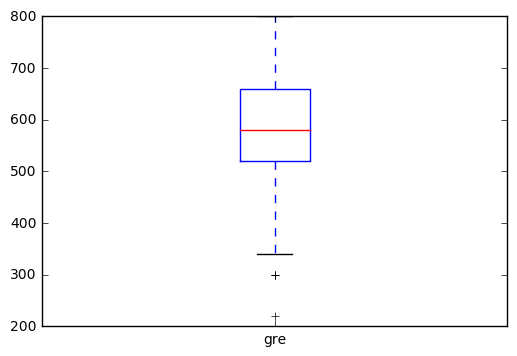

In [19]:
#boxplot gre
df['gre'].plot(kind='box')

In [20]:
!pip install plotly

In [21]:
#Awesome colorful boxplot designs. Source:- https://plot.ly/python/box-plots/
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [22]:
plotly.tools.set_credentials_file(username='vaafa65f', api_key='9a1vlGVUpJiVl71LhTeg')

In [23]:
#Let's plat gre

data = [go.Box(x= df.gre,name = 'GRE',
        boxpoints='all',jitter=0.5,
        pointpos=0,marker = dict(color = 'rgb(150, 12, 100)',
        )
    )
]
py.iplot(data)

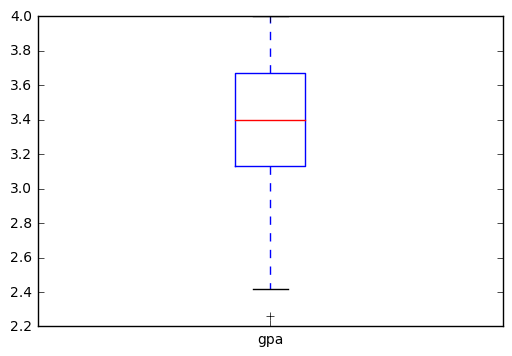

In [24]:
#boxplot gpa
df['gpa'].plot(kind='box')

In [25]:
#Let's plat gpa

data = [go.Box(x= df.gre,name = 'GPA',
        boxpoints='all',jitter=0.5,
        pointpos=0,marker = dict(color = 'rgb(40, 12, 110)',
        )
    )
]
py.iplot(data)

#### Question 7. What do this plots show?

Answer: The two box plots show the data points for both GRE and GPA. We can also say that both GPA and GRE values lean towards the continuous model. 

#### Question 8. Describe each distribution 

In [26]:
# plot the distribution of each variable 
df.gpa.kurt()
#Showing kurtosis for gpa. This shows negative kurtosis for gpa. 

-0.56356989952216807

In [27]:
df.gre.kurt() #Showing kurtosis for gre. This shows negative kurtosis for gre. A normal distribution will be 0.
#gre looks to be more distributed than gpa.

-0.33286435465143427

In [28]:
df.gpa.skew() #negatively skewed gpa

-0.21688893296924305

In [29]:
df.gre.skew()#negatively skewed gre

-0.146046988215597

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159cbad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118300050>]], dtype=object)

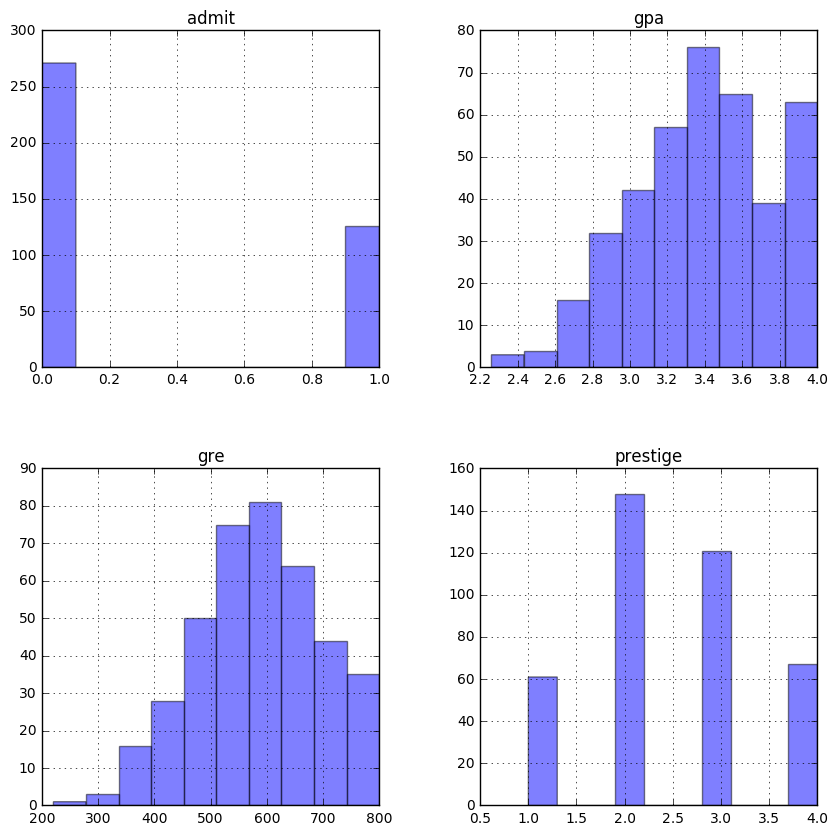

In [30]:
plt.figure() #Plotting this on the graph
df.hist(color=('blue'), 
        alpha=.5, bins=10, 
        figsize = (10,10)) 

#Both gpa and gre are negatively skewed or the data is shifted to the right.

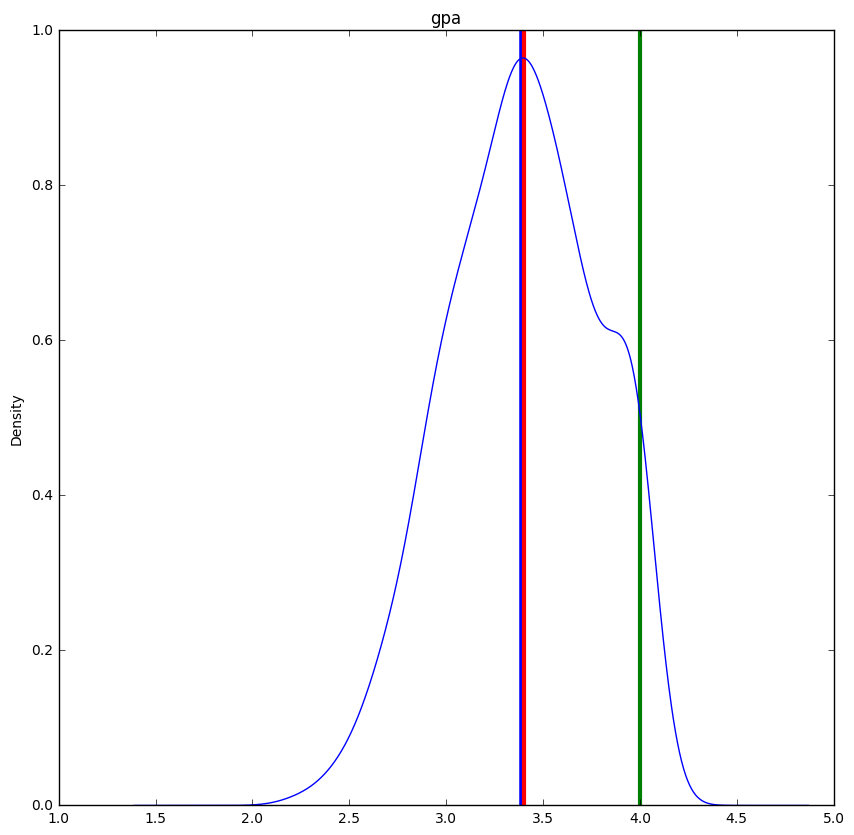

In [31]:
plt.figure() #Plotting the distribution of gpa
df.gpa.plot.kde(title = 'gpa', figsize = (10,10))

plt.vlines(df.gpa.mean(), ymin = 0, ymax = 1, linewidth = 4.0, color = 'blue')
plt.vlines(df.gpa.median(), ymin = 0, ymax = 1, linewidth = 3.0, color = 'red')
plt.vlines(df.gpa.mode(), ymin = 0, ymax = 1, linewidth = 3.0, color = 'green')

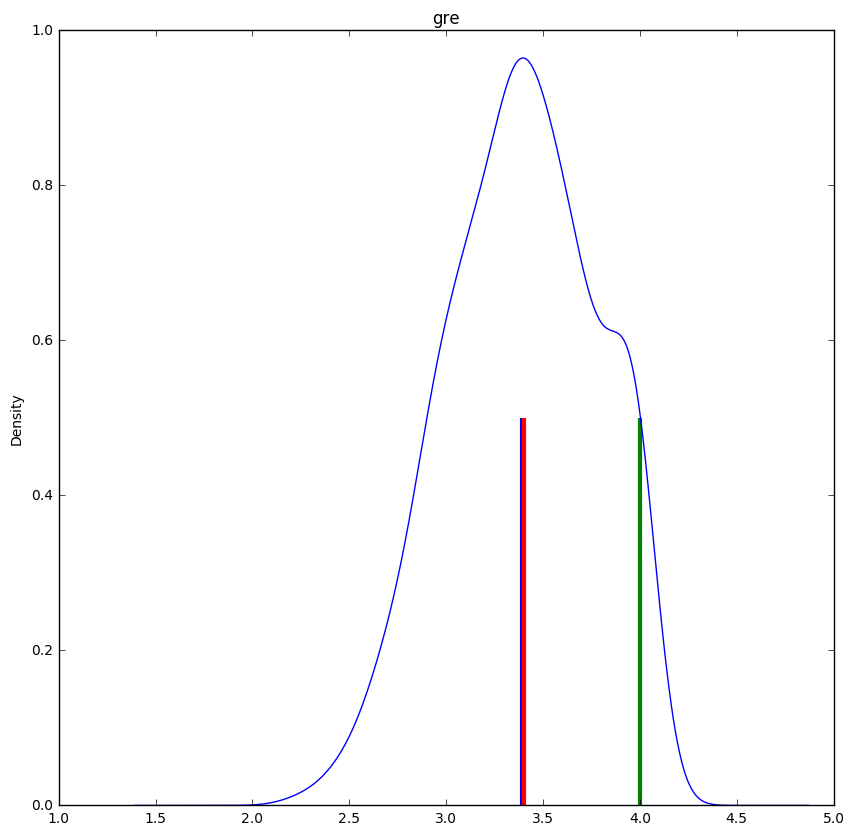

In [32]:
plt.figure() #Plotting the distribution of gre
df.gpa.plot.kde(title = 'gre', figsize = (10,10))

plt.vlines(df.gpa.mean(), ymin = 0, ymax = .5, linewidth = 3.0, color = 'blue')
plt.vlines(df.gpa.median(), ymin = 0, ymax = .5, linewidth = 3.0, color = 'red')
plt.vlines(df.gpa.mode(), ymin = 0, ymax = .5, linewidth = 3.0, color = 'green')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: I believe that is correct because if a bell curve were drawn over the variables GRE, GPA and prestige, we would be able to see the normal distribution because it is slightly symmetric with higher ranges. Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.  Skewness tells you the amount and direction of skew whether departure from horizontal symmetry. There seems to be some skewness in the graph but GRE is looks to be more normally distributed than GPA.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The data seems to be evenly distributed even though skewness exist. I don't think this distribution need any correction because the data looks be normal.

#### Question 11. Which of our variables are potentially colinear? 

In [33]:
#defining correlation
Correlation = df[["gre", "gpa", "prestige"]].corr() 

In [34]:
# create a correlation matrix for the data
df[["gre", "gpa", "prestige"]].corr() 

,gre,gpa,prestige
gre,1.000000,0.382408,-0.124533
gpa,0.382408,1.000000,-0.060976
prestige,-0.124533,-0.060976,1.000000


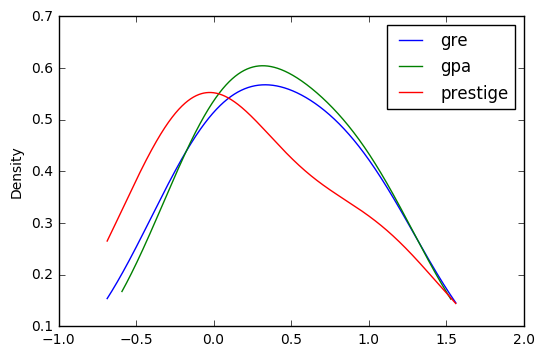

In [35]:
plt.figure() #Let's plot this
Correlation.plot.kde()

#### Question 12. What did you find?

Answer: Both gpa and gre have weak positive correlation

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:

1. Know the basic data characteristics and distribution of the variables.

2. Decide of the analysis to use and in this case, we can use a regression analysis because we've discovered a moderately strong correlation between the two variables. The Ordinary Least Squares Regression model can be used here. 

3. The variable Admit ('Admit') can be use as the outcome y and Prestige ('Prestige') as our predictor X.


y = df_raw.Admit # response X = df_raw.Prestige # predictor X = sm.add_constant(X)

#### Question 14. What is your hypothesis? 

Answer: Prestige does have an effect on graduate school admissions.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [36]:
#same as above
print "GRE null",np.where(df_raw['gre'].isnull())[0]
print "GPA null", np.where(df_raw['gpa'].isnull())[0]

#Null values are 187,212,236

GRE null [187 212]
GPA null [187 236]


In [37]:
print df_raw.loc[187]
print df_raw.loc[212]
print df_raw.loc[236]

#missing data dropped

admit       0.0
gre         NaN
gpa         NaN
prestige    2.0
Name: 187, dtype: float64
admit       0.00
gre          NaN
gpa         2.87
prestige    2.00
Name: 212, dtype: float64
admit         1.0
gre         660.0
gpa           NaN
prestige      NaN
Name: 236, dtype: float64


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data